In [35]:
# import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')

# df = pd.read_csv('loan_data_2007_2014.csv')
# df.columns
# df1 = df[['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
#        'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
#        'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
#        'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
#        'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
#        'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
#        'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
#        'initial_list_status']]
# df2 = df[['out_prncp', 'out_prncp_inv', 'total_pymnt',
#        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
#        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
#        'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
#        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
#        'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
#        'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
#        'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
#        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
#        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
#        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']]

# df1.isna().sum()

In [13]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

df = pd.read_csv('loan_data_2007_2014.csv')

### Check Duplicate

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool

### Check Null

In [15]:
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [16]:
df.loan_status.value_counts()

status = []

for index , kolom in df.iterrows():
    if 'Current' in  kolom['loan_status']:
        status.append(1)
    elif 'Fully Paid'in  kolom['loan_status']:
        status.append(1)
    elif 'In Grace Period 'in  kolom['loan_status']:
        status.append(1)
    else:
        status.append(0)
        
df['Status'] = status

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Status
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
df_penting = df[['loan_amnt', 'int_rate', 'installment', 'grade', 'annual_inc', 'issue_d', 'pymnt_plan', 'delinq_2yrs', 'mths_since_last_delinq',
              'open_acc', 'revol_bal', 'revol_util', 'total_pymnt', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
              'acc_now_delinq', 'tot_cur_bal', 'total_rev_hi_lim', 'Status']]
df_penting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   int_rate                    466285 non-null  float64
 2   installment                 466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   annual_inc                  466281 non-null  float64
 5   issue_d                     466285 non-null  object 
 6   pymnt_plan                  466285 non-null  object 
 7   delinq_2yrs                 466256 non-null  float64
 8   mths_since_last_delinq      215934 non-null  float64
 9   open_acc                    466256 non-null  float64
 10  revol_bal                   466285 non-null  int64  
 11  revol_util                  465945 non-null  float64
 12  total_pymnt                 466285 non-null  float64
 13  recoveries    

In [18]:
df_penting.isna().sum()

loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
annual_inc                         4
issue_d                            0
pymnt_plan                         0
delinq_2yrs                       29
mths_since_last_delinq        250351
open_acc                          29
revol_bal                          0
revol_util                       340
total_pymnt                        0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med       145
acc_now_delinq                    29
tot_cur_bal                    70276
total_rev_hi_lim               70276
Status                             0
dtype: int64

In [19]:
df_penting['mths_since_last_delinq'].fillna(df_penting['mths_since_last_delinq'].median(), inplace = True)
df_penting['open_acc'].fillna(df_penting['open_acc'].median(), inplace = True)
df_penting['revol_util'].fillna(df_penting['revol_util'].median(), inplace = True)
df_penting['collections_12_mths_ex_med'].fillna(df_penting['collections_12_mths_ex_med'].median(), inplace = True)
df_penting['acc_now_delinq'].fillna(df_penting['acc_now_delinq'].median(), inplace = True)
df_penting['annual_inc'].fillna(df_penting['annual_inc'].median(), inplace = True)
df_penting['tot_cur_bal'].fillna(df_penting['tot_cur_bal'].median(), inplace = True)
df_penting['total_rev_hi_lim'].fillna(df_penting['total_rev_hi_lim'].median(), inplace = True)
df_penting['delinq_2yrs'].fillna(df_penting['delinq_2yrs'].median(), inplace = True)

In [20]:
df_penting.isna().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
annual_inc                    0
issue_d                       0
pymnt_plan                    0
delinq_2yrs                   0
mths_since_last_delinq        0
open_acc                      0
revol_bal                     0
revol_util                    0
total_pymnt                   0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_cur_bal                   0
total_rev_hi_lim              0
Status                        0
dtype: int64

## Heatmap

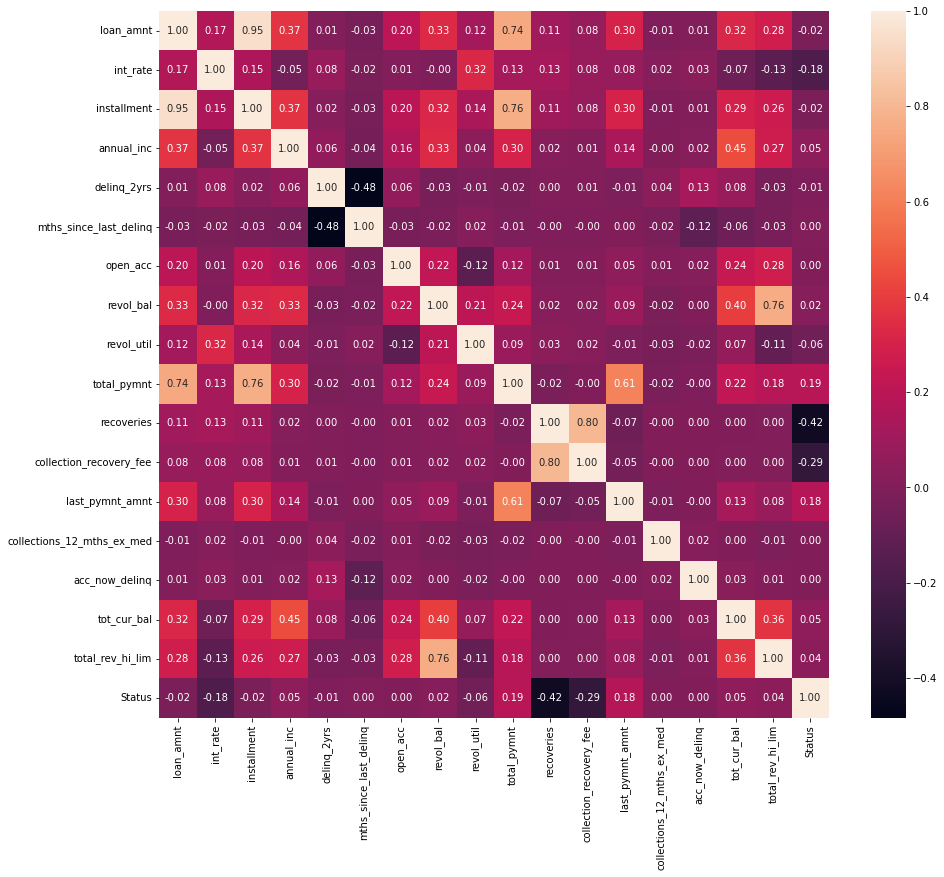

In [21]:
plt.figure(figsize = (15,13))
sns.heatmap(df_penting.corr(), annot = True, fmt = '.2f');

### Feature Selection (2)

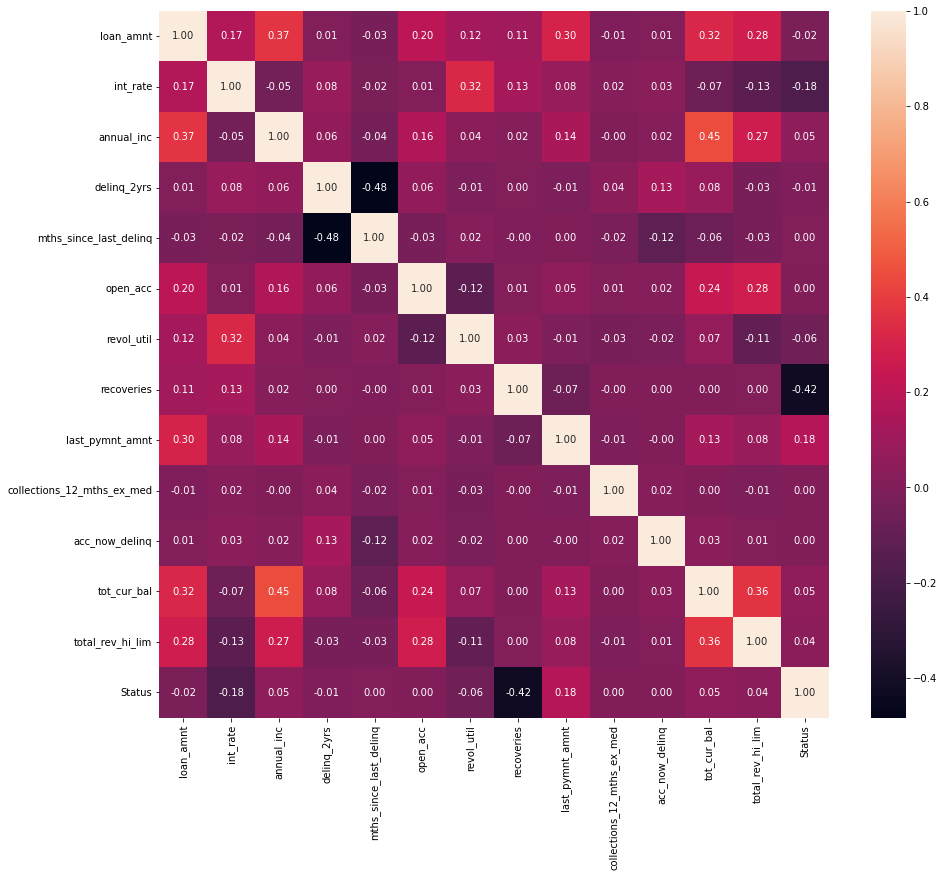

In [22]:
df_dropped = df_penting.drop(columns = ['installment', 'total_pymnt', 'revol_bal', 'collection_recovery_fee', 'issue_d'])
plt.figure(figsize = (15,13))
sns.heatmap(df_dropped.corr(), annot = True, fmt = '.2f');

In [23]:
df_dropped.describe()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,revol_util,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,Status
count,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,4.662850e+05,466285.000000
mean,14317.277577,13.829236,7.327729e+04,0.284661,32.437644,11.186995,56.177985,85.344211,3123.913796,0.009082,0.004002,1.301714e+05,2.923681e+04,0.881334
std,8286.509164,4.357587,5.496334e+04,0.797343,14.901093,4.987380,23.724005,552.216084,5554.737393,0.108632,0.068635,1.416729e+05,3.443264e+04,0.323395
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,10.990000,4.500000e+04,0.000000,31.000000,8.000000,39.200000,0.000000,312.620000,0.000000,0.000000,3.361100e+04,1.500000e+04,1.000000
50%,12000.000000,13.660000,6.300000e+04,0.000000,31.000000,10.000000,57.600000,0.000000,545.960000,0.000000,0.000000,8.153900e+04,2.280000e+04,1.000000
75%,20000.000000,16.490000,8.895300e+04,0.000000,31.000000,14.000000,74.700000,0.000000,3187.510000,0.000000,0.000000,1.849300e+05,3.430000e+04,1.000000
max,35000.000000,26.060000,7.500000e+06,29.000000,188.000000,84.000000,892.300000,33520.270000,36234.440000,20.000000,5.000000,8.000078e+06,9.999999e+06,1.000000


## Handling Outliers

In [57]:
from scipy import stats

print('Jumlah baris sebelum memfilter outlier:', len(df_dropped))

filtered_entries = np.array([True] * len(df))

for col in ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'revol_util', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim', 'Status']:
    
    zscore = abs(stats.zscore(df_dropped[col])) #  absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_dropped = df_dropped[filtered_entries] # ambil yang z-scorenya dibawah 3

print('Jumlah baris setelah memfilter outlier:', len(df_dropped))

Jumlah baris sebelum memfilter outlier: 409433


ValueError: operands could not be broadcast together with shapes (409433,) (466285,) 

## Scalling

In [25]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   409433 non-null  int64  
 1   int_rate                    409433 non-null  float64
 2   grade                       409433 non-null  object 
 3   annual_inc                  409433 non-null  float64
 4   pymnt_plan                  409433 non-null  object 
 5   delinq_2yrs                 409433 non-null  float64
 6   mths_since_last_delinq      409433 non-null  float64
 7   open_acc                    409433 non-null  float64
 8   revol_util                  409433 non-null  float64
 9   recoveries                  409433 non-null  float64
 10  last_pymnt_amnt             409433 non-null  float64
 11  collections_12_mths_ex_med  409433 non-null  float64
 12  acc_now_delinq              409433 non-null  float64
 13  tot_cur_bal   

<AxesSubplot:>

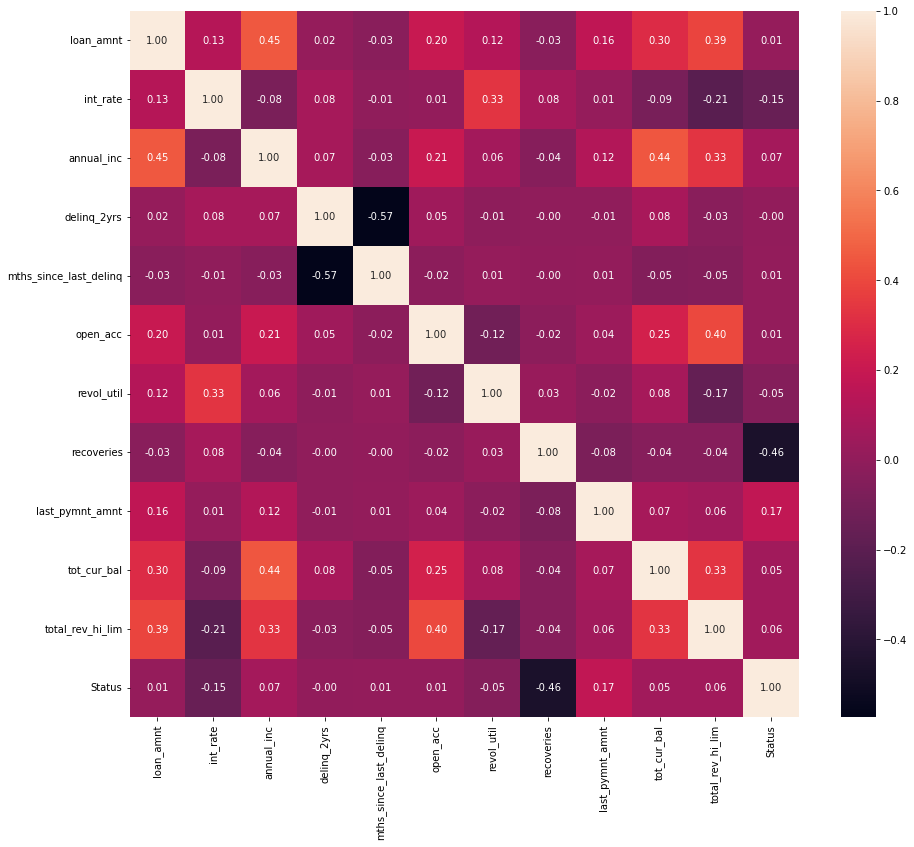

In [26]:
df_clean = df_dropped.drop(columns = ['collections_12_mths_ex_med', 'acc_now_delinq'])
plt.figure(figsize = (15,13))
sns.heatmap(df_clean.corr(), annot = True, fmt = '.2f')

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_clean['loan_amnt_norm'] = MinMaxScaler().fit_transform(df_clean['loan_amnt'].values.reshape(len(df_clean), 1))
df_clean['int_rate_norm'] = MinMaxScaler().fit_transform(df_clean['int_rate'].values.reshape(len(df_clean), 1))
df_clean['annual_inc_std'] = StandardScaler().fit_transform(df_clean['annual_inc'].values.reshape(len(df_clean), 1))
df_clean['delinq_2yrs_norm'] = MinMaxScaler().fit_transform(df_clean['delinq_2yrs'].values.reshape(len(df_clean), 1))
df_clean['mths_since_last_delinq_norm'] = MinMaxScaler().fit_transform(df_clean['mths_since_last_delinq'].values.reshape(len(df_clean), 1))
df_clean['open_acc_norm'] = MinMaxScaler().fit_transform(df_clean['open_acc'].values.reshape(len(df_clean), 1))
df_clean['revol_util_norm'] = MinMaxScaler().fit_transform(df_clean['revol_util'].values.reshape(len(df_clean), 1))
df_clean['recoveries_std'] = StandardScaler().fit_transform(df_clean['recoveries'].values.reshape(len(df_clean), 1))
df_clean['last_pymnt_amnt_std'] = StandardScaler().fit_transform(df_clean['last_pymnt_amnt'].values.reshape(len(df_clean), 1))
df_clean['tot_cur_bal_std'] = StandardScaler().fit_transform(df_clean['tot_cur_bal'].values.reshape(len(df_clean), 1))
df_clean['total_rev_hi_lim_std'] = StandardScaler().fit_transform(df_clean['total_rev_hi_lim'].values.reshape(len(df_clean), 1))

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    409433 non-null  int64  
 1   int_rate                     409433 non-null  float64
 2   grade                        409433 non-null  object 
 3   annual_inc                   409433 non-null  float64
 4   pymnt_plan                   409433 non-null  object 
 5   delinq_2yrs                  409433 non-null  float64
 6   mths_since_last_delinq       409433 non-null  float64
 7   open_acc                     409433 non-null  float64
 8   revol_util                   409433 non-null  float64
 9   recoveries                   409433 non-null  float64
 10  last_pymnt_amnt              409433 non-null  float64
 11  tot_cur_bal                  409433 non-null  float64
 12  total_rev_hi_lim             409433 non-null  float64
 13 

In [29]:
#drop columns orginal before scalling
df_cleaning = df_clean.drop(columns = ['loan_amnt', 'int_rate', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc',
                                       'revol_util', 'recoveries', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim'])
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   grade                        409433 non-null  object 
 1   pymnt_plan                   409433 non-null  object 
 2   Status                       409433 non-null  int64  
 3   loan_amnt_norm               409433 non-null  float64
 4   int_rate_norm                409433 non-null  float64
 5   annual_inc_std               409433 non-null  float64
 6   delinq_2yrs_norm             409433 non-null  float64
 7   mths_since_last_delinq_norm  409433 non-null  float64
 8   open_acc_norm                409433 non-null  float64
 9   revol_util_norm              409433 non-null  float64
 10  recoveries_std               409433 non-null  float64
 11  last_pymnt_amnt_std          409433 non-null  float64
 12  tot_cur_bal_std              409433 non-null  float64
 13 

<AxesSubplot:>

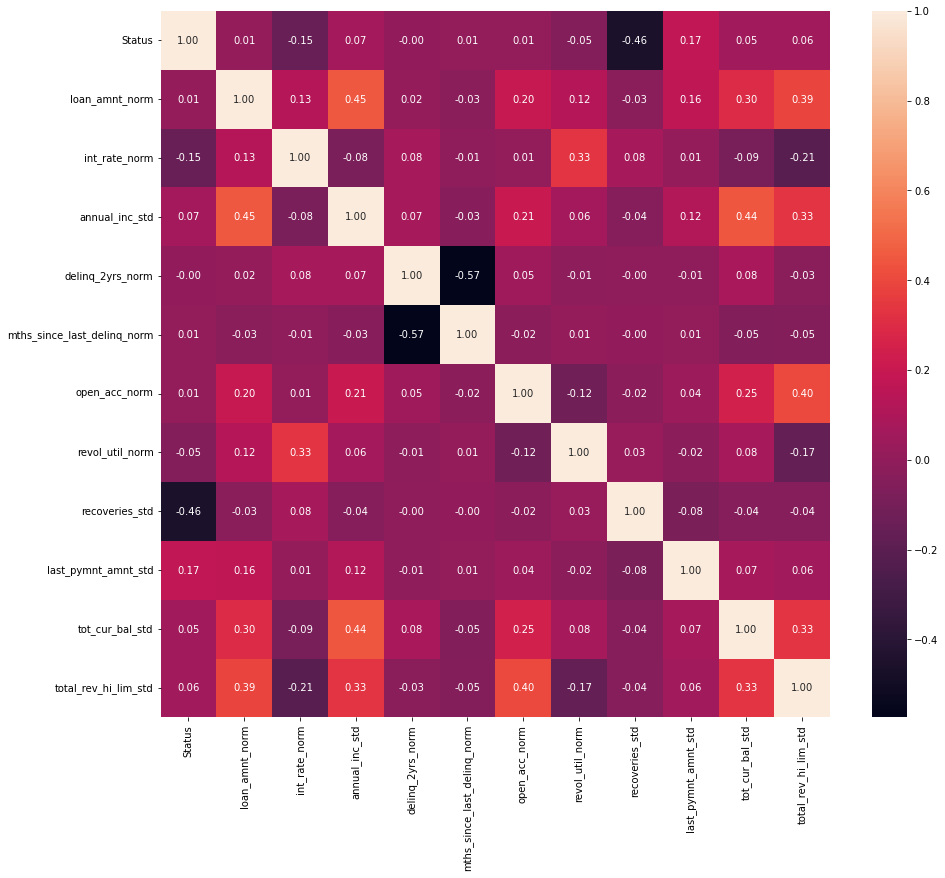

In [30]:
plt.figure(figsize = (15,13))
sns.heatmap(df_cleaning.corr(), annot = True, fmt = '.2f')

## Feature Encoding

In [31]:
for cat in ['grade', 'pymnt_plan']:
    onehots = pd.get_dummies(df_cleaning[cat], prefix=cat)
    df_cleaning = df_cleaning.join(onehots)

In [32]:
df_cleaning = df_cleaning.drop(columns = ['pymnt_plan', 'grade'])
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409433 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Status                       409433 non-null  int64  
 1   loan_amnt_norm               409433 non-null  float64
 2   int_rate_norm                409433 non-null  float64
 3   annual_inc_std               409433 non-null  float64
 4   delinq_2yrs_norm             409433 non-null  float64
 5   mths_since_last_delinq_norm  409433 non-null  float64
 6   open_acc_norm                409433 non-null  float64
 7   revol_util_norm              409433 non-null  float64
 8   recoveries_std               409433 non-null  float64
 9   last_pymnt_amnt_std          409433 non-null  float64
 10  tot_cur_bal_std              409433 non-null  float64
 11  total_rev_hi_lim_std         409433 non-null  float64
 12  grade_A                      409433 non-null  uint8  
 13 

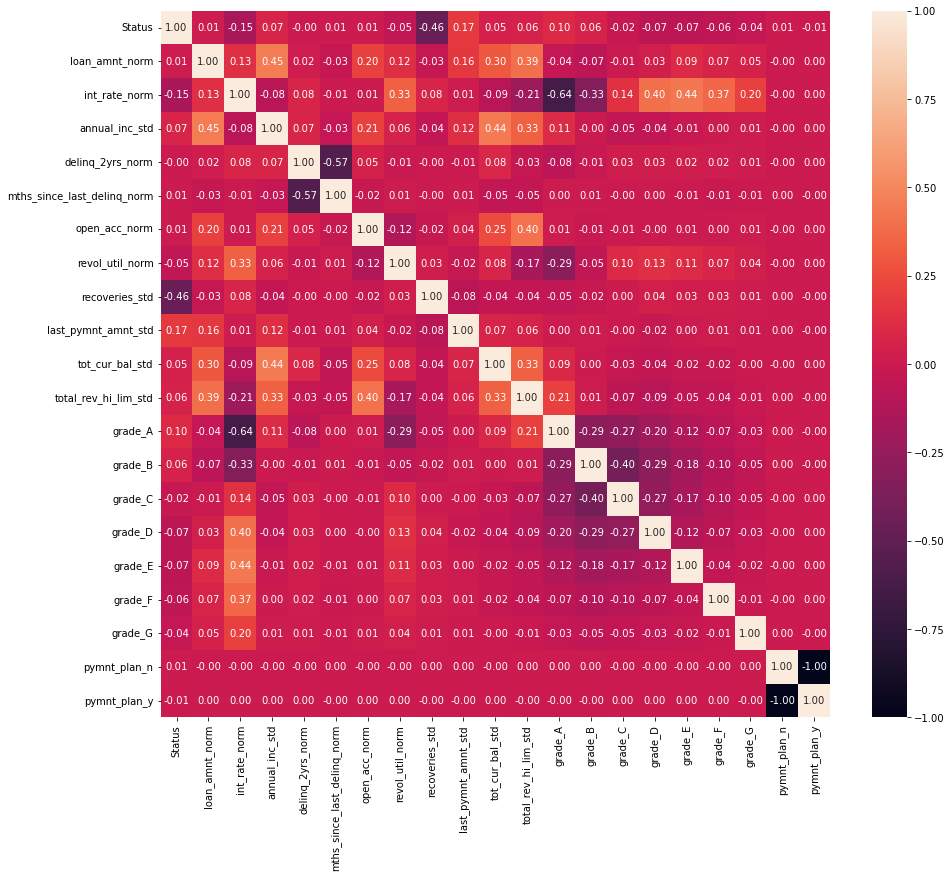

In [33]:
plt.figure(figsize = (15,13))
sns.heatmap(df_cleaning.corr(), annot = True, fmt = '.2f');

## Modelling

In [34]:
X = df_cleaning.drop(labels=['Status'],axis=1)
y = df_cleaning[['Status']]

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 42)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [37]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [38]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet','none']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga','none']
class_weight = [{0: 1, 1: 1},
                {0: 1, 1: 2}, 
                {0: 1, 1: 3},
                {0: 1, 1: 4},
                'none']
hyperparameters = dict(penalty=penalty, C=C,class_weight=class_weight,solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.92
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.83


## Evaluation

In [42]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import roc_auc_score #ini gapake predict_proba
roc_auc_score(y_test, y_pred)

0.6386146192116342

In [44]:
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.92
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.83


In [45]:
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
print('Train score: ' + str(model.score(X_train, y_train))) #tes accuracy
print('Test score:' + str(model.score(X_test, y_test))) #test accuracy

Recall (Train Set): 1.00
Train score: 1.0
Test score:1.0


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_classification(dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.93
Recall (Test Set): 0.92
F1-Score (Test Set): 0.93
AUC: 0.69


In [47]:
y_pred_train = dt.predict(X_train)
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Recall (Train Set): 1.00


In [49]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.8732394366197183


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
AUC: 0.84


In [51]:
y_pred_train = rf.predict(X_train)
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Recall (Train Set): 1.00


In [52]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.9999825542649589
Test score:0.9309126434910038


## KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = knn.predict(X_test)
eval_classification(knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.93
Recall (Test Set): 0.99
F1-Score (Test Set): 0.96
AUC: 0.73


In [54]:
ins = df.groupby(['loan_status']).agg({'id' : 'count'}).sort_values(['id'], ascending = False).reset_index()
ins.columns = ['loan_status', 'frequency']
ins['percentage %'] = round(ins['frequency']*100/sum(ins['frequency']),2)
ins

,loan_status,frequency,percentage %
0,Current,224226,48.09
1,Fully Paid,184739,39.62
2,Charged Off,42475,9.11
3,Late (31-120 days),6900,1.48
4,In Grace Period,3146,0.67
5,Does not meet the credit policy. Status:Fully ...,1988,0.43
6,Late (16-30 days),1218,0.26
7,Default,832,0.18
8,Does not meet the credit policy. Status:Charge...,761,0.16
